In [1]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv(r'E:\ExcelR ass\KNN\glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
# split data :
x = data.iloc[:,0:9]
y = data.iloc[:,9]
# x.head()
# x.shape                 # (214, 9)

(214, 9)

In [53]:
# Grid-Search without applying cross-validation :
import numpy as np
from sklearn.model_selection import GridSearchCV
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid = param_grid)
grid.fit(x,y)
print(grid.best_score_)
grid.best_params_

0.640531561461794


{'n_neighbors': 1}

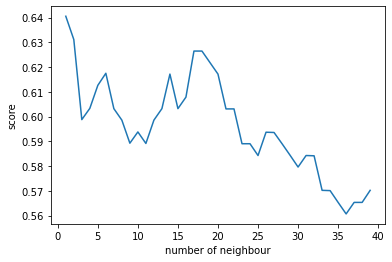

0.640531561461794


In [54]:
# kfold cross-validation :
import matplotlib.pyplot as plt
%matplotlib inline
k_range = range(1,40)
k_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x, y,)
    k_score.append(scores.mean())
plt.plot(k_range, k_score)
plt.xlabel("number of neighbour")
plt.ylabel("score")
plt.show()
print(max(k_score))

C:\Users\mites\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\mites\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=11.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\mites\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=12.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\mites\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=13.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\mites\anaconda3\lib\site-packag

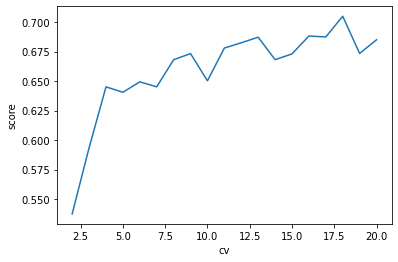

0.7049663299663299


In [50]:
# find best cv value :
import matplotlib.pyplot as plt
%matplotlib inline
k_range = range(2,21)
k_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = 1)
    scores = cross_val_score(knn, x, y, cv=k)
    k_score.append(scores.mean())
plt.plot(k_range, k_score)
plt.xlabel("cv")
plt.ylabel("score")
plt.show()
print(max(k_score))

In [55]:
# from above graphs we take k = 17 and cv = 4
model_1 = KNeighborsClassifier(n_neighbors=17)
result = cross_val_score(model_1, x, y, cv=4)
print("accuracy at k = 17 and cv = 4 is =",result.mean())                           # cv=4, k = 17 (65.92 %)

accuracy at k = 17 and cv = 4 is = 0.6592417889587701


In [57]:
model_2 = KNeighborsClassifier(n_neighbors=1)
result = cross_val_score(model_2, x, y, cv=18)
print("accuracy at k = 1 and cv = 18 is =",result.mean())                           

accuracy at k = 1 and cv = 18 is = 0.7049663299663299


C:\Users\mites\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=18.
  warnings.warn(("The least populated class in y has only %d"


In [58]:
model_3 = KNeighborsClassifier(n_neighbors=17)
result = cross_val_score(model_3, x, y, cv=18)
print("accuracy at k = 17 and cv = 18 is =",result.mean())                           

accuracy at k = 17 and cv = 18 is = 0.611952861952862


C:\Users\mites\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=18.
  warnings.warn(("The least populated class in y has only %d"


In [87]:
# creating model using train_test_split model validation technique :
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(std_x, y, test_size=0.30, random_state=7)
model = KNeighborsClassifier(1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [88]:
pd.crosstab(y_pred, y_test)

Type,1,2,3,5,6,7
row_0,,,,,,
1,13,5,1,0,0,0
2,3,20,2,1,0,0
3,4,3,1,0,0,0
5,0,0,0,2,0,0
6,0,1,0,1,1,0
7,0,0,0,0,0,7


In [89]:
np.mean(y_test == y_pred)

0.676923076923077

In [91]:
# gridsearch for train_test_split ;
clf = GridSearchCV(estimator=model, param_grid = param_grid)
clf.fit(x_train, y_train)
print(grid.best_score_)         # 64.05 % training accuracy
grid.best_params_

0.640531561461794


{'n_neighbors': 1}

In [92]:
pred = clf.predict(x_test)
pd.crosstab(y_test, pred)
np.mean(y_test == pred)      # 67.69% test accuracy

0.676923076923077

In [101]:
# model validation : leave-one-out :
from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()
models = [model, model_1, model_2, model_3]
std_score = []
accuracy = []
for i in models :
    res = cross_val_score(i, x, y, cv=loocv)
# res.mean()*100
    std_score.append(res.std()*100)
    accuracy.append(res.mean()*100)
print(std_score)
print(accuracy)

[44.20521230385896, 48.50143147291456, 44.20521230385896, 48.50143147291456]
[73.36448598130842, 62.149532710280376, 73.36448598130842, 62.149532710280376]


In [102]:
# from above calculation we can conclude that high std_score lead to fail the model 
# that means model {k=1} and model_2 {k=1 and cv=18} is good model with compare to other models.